## Analysing Experiments For Training Neural Network on MNIST Using Metaflow

In [1]:
from metaflow import Metaflow, Flow, get_metadata,Run
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/valaydave/Documents/Code-Workspace/Exploration-Projects/Metaflow-runner


In [2]:
print(Metaflow().flows) # Helping me find all the Main Flows/Experiments I have conducted

[Flow('MNISTNeuralNetworkExperimentationFlow')]


In [3]:
flow = Flow('MNISTNeuralNetworkExperimentationFlow') # Prints the Runs in Each Flow. 
for run in flow:
    print(run)

Run('MNISTNeuralNetworkExperimentationFlow/1581189936651632')
Run('MNISTNeuralNetworkExperimentationFlow/1581188997903040')
Run('MNISTNeuralNetworkExperimentationFlow/1581187116985587')


## Analysing Individual Experiments

In [4]:
run = Flow('MNISTNeuralNetworkExperimentationFlow').latest_successful_run # Get the Latest Run that was completely done. 

In [5]:
run_history = run.data.history

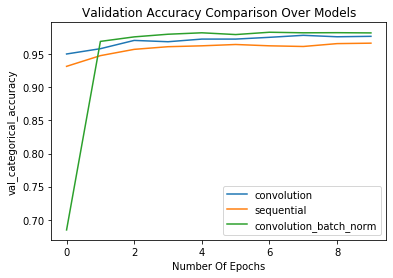

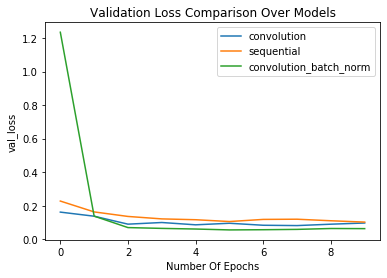

In [6]:
fig_1 = plt.figure()
legend = []
for key in run_history:
    x_data = [i for i in range(len(run_history[key]['acc']))]
    plt.plot(x_data,run_history[key]['val_categorical_accuracy'])
    legend.append(key)

plt.title('Validation Accuracy Comparison Over Models')
plt.ylabel('val_categorical_accuracy')
plt.xlabel('Number Of Epochs')
plt.legend(legend,loc='best')

fig_2 = plt.figure()
for key in run_history:
    x_data = [i for i in range(len(run_history[key]['acc']))]
    plt.plot(x_data,run_history[key]['val_loss'])

plt.title('Validation Loss Comparison Over Models')
plt.ylabel('val_loss')
plt.xlabel('Number Of Epochs')
plt.legend(legend,loc='best')
plt.show()


## Analysing Metrics with Variation of Data 

In [7]:
# Create an object which holds the {network: { num_training_examples : {historyObject} }} : This is done so that we can analyse our information quickly. 
flow = Flow('MNISTNeuralNetworkExperimentationFlow') 
network_analysis = {} 
for run in flow: # For each run Extract the Number of Training Examples and 
    if run.data is None:
        continue
    num_training_examples = run.data.num_training_examples
    run_history = run.data.history
    for network in run_history:
        if network not in network_analysis:
            network_analysis[network] = {}
        network_analysis[network][num_training_examples] = run_history[network]


In [8]:
# $ This function helps visualise and compare over different parameters such as Loss, Validation Loss, val Accuracy, Accuracy, Etc.
def plot_new_figures_from_network_analysis(analysis_map,analysis_key='val_categorical_accuracy'):
    figures = []
    for model_name in analysis_map:
        figures.append(plt.figure())
        legend = []
        # model_name = 'convolution'
        for datasize in analysis_map[model_name]:
            x_data = [i for i in range(len(analysis_map[model_name][datasize]['acc']))]
            plt.plot(x_data,analysis_map[model_name][datasize][analysis_key])
            legend.append(datasize)

        plt.title('{0} Comparison Over Datasize For {1} Model'.format(analysis_key,model_name))
        plt.ylabel(analysis_key)
        plt.xlabel('Number Of Epochs')
        plt.legend(legend,loc='best')
    plt.show()


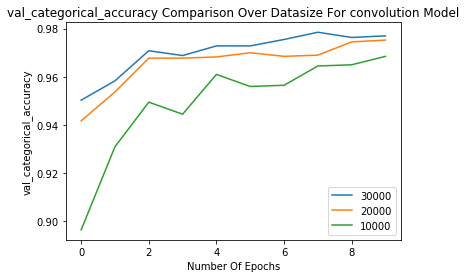

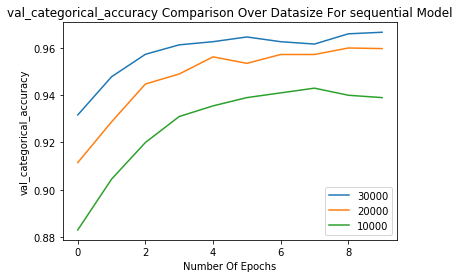

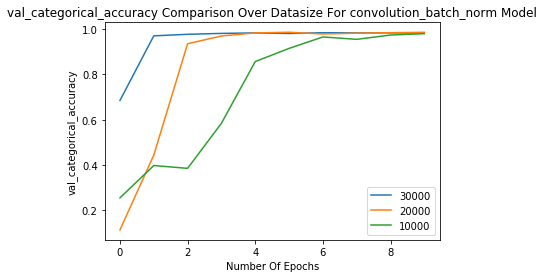

In [9]:
plot_new_figures_from_network_analysis(network_analysis,analysis_key='val_categorical_accuracy')

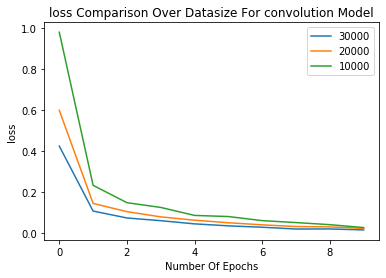

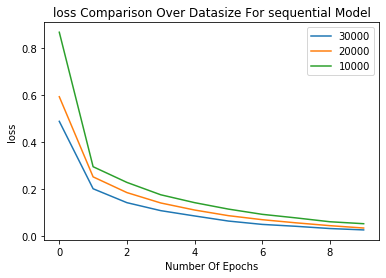

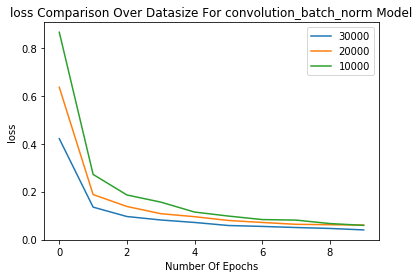

In [10]:
plot_new_figures_from_network_analysis(network_analysis,analysis_key='loss')